# Overview

We're now switching focus away from Network Science (for a little bit), beginning to think about _Natural Language Processing_ instead. In other words, today will be all about teaching your computer to "understand" text. This ties in nicely with our work on the rappers network, since it is built on the rapper Wikipedia pages which contain pieces of text. We've looked at the network so far - now, let's see if we can include the text. Today is about 

* Installing the _natural language toolkit_ (NLTK) package and learning the basics of how it works (Chapter 1)
* Figuring out how to make NLTK to work with other types of text (Chapter 2).

> _Reading_
> The reading for today is Natural Language Processing with Python (NLPP) Chapter 1 and 2. [It's free online](http://www.nltk.org/book/). 

# Part 1: A little lecture

> [**_Video Lecture_**](https://www.dropbox.com/scl/fi/vj2h6pekdl6y8yid070y5/NLP_Intro.mp4?rlkey=kajuxgfl413ql3q1qwdrqf9ok&dl=0). Today is all about ***working*** with NLTK, so not much lecturing - just a few words on NLP.

# Part 2: Installing and the basics

## 2.1 NLTK Install tips 

Check to see if `nltk` is installed on your system by typing `import nltk` in a `notebook`. If it's not already installed, install it as part of _Anaconda_ by typing 

     conda install nltk 

at the command prompt. If you don't have them, you can download the various corpora using a command-line version of the downloader that runs in Python notebooks (as mentioned in Ch. 1 Sec. 1.2 of the book): 

In the Jupyter notebook, run the code 

 `import nltk`
 
 `nltk.download()`

Now you can hit `d` to download, then type "book" to fetch the collection needed today's `nltk` session. Now that everything is up and running, let's get to the actual exercises.

**Note**: If, instead of opening the pop-up, your Kernel dies, you can direclty download the collection by typing `nltk.download("book")` instead.

In [1]:
import nltk

# nltk.download("book")

## 2.2 Introduction to NLTK

1. Now that you have `nltk` installed, work through Chapter 1, Sections 1 to 4. The book is set up as a kind of tutorial with lots of examples for you to work through. I recommend you read the text with an open Jupyter Notebook and type out the examples that you see. ***It becomes much more fun if you add a few variations and see what happens***. We tweaked some of these examples in the following exercises and they might very well be due as assignments, so those ones should definitely be in a `notebook`.

2. Now that you have gone through Chapter 1, let's try some of the `nltk` functionalities on our own Text!

> Setup. We want to start from a clean version of the rapper Wikipedia pages. A version with as little wiki-markup as possible. We needed it earlier to get the links, but now we want a readable version. To do this we need to create 10 new regex patterns and parse the pages ... 
>
> No! Don't worry! We can get a fairly nice version directly from the Wikipedia API. Follow the instructions below:
>
> * read the [csv file](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/Rappers.csv) of the rappers with pandas `pd.read_csv()` and assign it to `df_rappers`, but change the parameters that you use to call the api to:      
    - `"action": "query"`   
    - `"prop": "extracts"`,
    - `"exlimit":"1"`,
    - `"explaintext": "1"`,
    - `"format": "json"`,
    - `"titles": [INSERT NAME OF THE RAPPER]` 
> * loop through the `Name` column of `df_rappers` and for each name make a request to the API
>     * **Note1** if you are using the `urllib`, replace white spaces with `_` and use `urllib.parse.quote_plus(NAME_OF_RAPPER_HERE)` to build your title;
> * after using `json` to load the text, remember to get the value (the clean text we are looking for) from the right key 
>     * **Note2** the key you are looking for is now `extract` and not `*`; check that your code gets the right page (you may have to do a manual exploration of the json structure again).
>
> Use this method to retrieve a nice copy of all rappers' text. Save each rapper's text in a txt file and collect them all in a new folder!

> Finally, we can create our own corpus (see Ch. 2 Sec. 1.9 for more details):
>    * create a list of file names `file_list` and order them with the same order in `df_rappers`, e.g., 03_Greedo.txt first, 22Gz.txt second, etc.
>    * use the function `PlaintextCorpusReader` from `nltk.corpus` to create the rapper corpus.
>    * use the function `nltk.Text()` as follows `nltk.Text(YOUR_CORPUS_HERE.words())`.
>
> Now you can use this nltk Text object as any other you've seen in the examples of Chapter 1!!

In [2]:
import requests
import pandas as pd
from nltk.corpus import PlaintextCorpusReader
from nltk import Text, ConditionalFreqDist, FreqDist, bigrams
import matplotlib.pyplot as plt


# set to true if we want to fetch all rapper articles via Wikipedia API
refetch_articles = False

In [3]:
# Fetch an extract from Wikipedia API. Returns the title and page content.
def fetch_wikipage(title):
    baseurl = "https://en.wikipedia.org/w/api.php?"
    params = {
        "action": "query",
        "prop": "extracts",
        "exlimit":"1",
        "explaintext": "1",
        "format": "json",
        "titles": title
    }
    data = requests.get(baseurl, params=params).json()
    id = list(dict(data["query"]["pages"]).keys())[0]
    content = data["query"]["pages"][id]
    return content["title"], content["extract"]

In [4]:
# load the list of east and west coast rappers from combined Rappers.csv
df_rappers = pd.read_csv("../files/Rappers.csv", names=["Name", "Coast"], header=0)
df_rappers.head()

,Name,Coast
0,6ix9ine,East
1,9th Prince,East
2,22Gz,East
3,38 Spesh,East
4,The 45 King,East


In [5]:
if refetch_articles:
    for name in df_rappers.Name:
        title, content = fetch_wikipage(name)
        filename = name.replace(" ", "_")
        # write content to text file
        with open(f"../files/rapper_texts/{filename}.txt", "w") as f:
            f.write(content)

> Finally, we can create our own corpus (see Ch. 2 Sec. 1.9 for more details):
>    * create a list of file names `file_list` and order them with the same order in `df_rappers`, e.g., 03_Greedo.txt first, 22Gz.txt second, etc.
>    * use the function `PlaintextCorpusReader` from `nltk.corpus` to create the rapper corpus.
>    * use the function `nltk.Text()` as follows `nltk.Text(YOUR_CORPUS_HERE.words())`.
>
> Now you can use this nltk Text object as any other you've seen in the examples of Chapter 1!!

In [6]:
# build the file name list from the Name column of df_rappers
file_list = [name.replace(" ", "_") + ".txt" for name in df_rappers.Name]

# construct the corpus from article texts
corpus_root = "../files/rapper_texts"
wordlists = PlaintextCorpusReader(corpus_root, file_list)
rappers_text = Text(wordlists.words())

### 2.3 Exercises: NLPP Chapter 1 
(the stuff that might be due in an upcoming assignment)

The following exercises are from Chapter 1 but we are going to use them to study the rapper Wikipedia text.

> *Exercise 1*: Exploratory analysis
>
> * Try out the `concordance` method, using the rapper Wikipedia text and a word of your own choosing.
> * Also try out the `similar` and `common_contexts` methods, again with any words you like.
> * Create the rapper Wikipedia version of a dispersion plot:
>    1. try your own version of the dispersion plot (use any set of words you like but remember to explain what you observe).
> * What is a bigram? How does it relate to `collocations`. Explain in your own words.
>    1. Compute the collocations on the rapper Wikipedia Text.
> * Review the discussion of conditionals in Sec. 4. Find all words in the rapper Wikipedia Text starting with the letter *h*. Show the first 5 in alphabetical order. Try with a few other letters. Any fun examples of top-five words?
> * Use `.index()` to find the index of the word *Snoop*. You'll need to insert this word as an argument between the parentheses. By a process of trial and error, find the slice for the complete sentence that contains this word.
> * Review the discussion of looping with conditions in Sec 4. Use a combination of `for` and `if` statements to loop over the words of the rapper Wikipedia text and print the 5 longest uppercase words, one per line.

In [7]:
rappers_text.concordance("shot")

Displaying 25 of 258 matches:
er , who also was Puerto Rican , was shot dead steps away from the family home
Benny the Butcher ) 2018 : Stabbed & Shot ( with Benny the Butcher ) 2018 : In
hug Love " music video , Jackson was shot and hospitalized . On May 24 , 2000 
nge with a 9mm handgun . Jackson was shot in the hand , arm , hip , both legs 
w mirror like , ' Oh shit , somebody shot me in the face ! It burns , burns , 
de Queens , he wrote : " After I got shot nine times at close range and didn '
inal activities . The rap artist was shot in 2000 , survived and thereafter re
ed entry , one of his associates was shot in the leg in a confrontation with a
 Jackson uploaded a video (" Warning Shot ") and the first of a series of " Of
pop song . I ' m no genius by a long shot , but these songs are not nonsensica
September 2011 , West survived being shot ten times . A tweet dated September 
he hand , five to the glutes and one shot to the thigh . ==== 2013 prison sent
. In early May 2013 , 

In [8]:
rappers_text.similar("shot")

released recorded made produced born arrested played used featured
signed created found was announced and in held set written recording


In [9]:
rappers_text.similar("police")

album song label time game single year ep rapper mixtape early group
track show world streets music billboard two name


In [10]:
rappers_text.common_contexts(["police", "released"])

york_in


> * Create the rapper Wikipedia version of a dispersion plot:
>    1. try your own version of the dispersion plot (use any set of words you like but remember to explain what you observe).
> * What is a bigram? How does it relate to `collocations`. Explain in your own words.
>    1. Compute the collocations on the rapper Wikipedia Text.
> * Review the discussion of conditionals in Sec. 4. Find all words in the rapper Wikipedia Text starting with the letter *h*. Show the first 5 in alphabetical order. Try with a few other letters. Any fun examples of top-five words?
> * Use `.index()` to find the index of the word *Snoop*. You'll need to insert this word as an argument between the parentheses. By a process of trial and error, find the slice for the complete sentence that contains this word.
> * Review the discussion of looping with conditions in Sec 4. Use a combination of `for` and `if` statements to loop over the words of the rapper Wikipedia text and print the 5 longest uppercase words, one per line.

In [11]:
print("Collocations in the rapper wikipedia articles:")
rappers_text.collocations()

Collocations in the rapper wikipedia articles:
New York; hip hop; External links; Los Angeles; studio album; stage
name; Billboard 200; Hot 100; American rapper; music video; Hip Hop;
Early life; Snoop Dogg; United States; York City; better known; debut
album; Billboard Hot; High School; Def Jam


Bigram is a pair of wordst to each other in a text. Bigrams become collocations if they occur unusually often (e.g. not simply due to grammer rules). Additionally a collocation has one form and can not be substituted with bigrams of similar meaning.

In [12]:
print("Words starting with h in the rapper wikipedia articles:")
h_words = [w for w in set(rappers_text) if w[0] == 'h']
print((", ").join(sorted(h_words[:5])))

Words starting with h in the rapper wikipedia articles:
harassing, heavier, hell, hired, horrible


In [13]:
print(f"The index of the word Snoop: {rappers_text.index('Snoop')}")
print("The complete sentence is:")
print((" ").join(rappers_text[43864:43902]))

The index of the word Snoop: 43891
The complete sentence is:
As a Songwriter , Asante wrote the lyrics for the 2023 - 2024 official Monday Night Football anthem , " In the Air Tonight ", performed by Snoop Dogg , Chris Stapleton , and Cindy Blackman Santana .


In [14]:
print("The 5 longest uppercacse words are:")
print(('\n').join(sorted([w for w in rappers_text if w.isupper()], key=lambda x: len(x), reverse=True)[:5]))

The 5 longest uppercacse words are:
CHRISTMAKWHANNUVUSWALIYEARS
SHINIGAMISTARSHIP
AREYOUREADYKIDS
MERRYPOCALYPSE
CHAMILLIONAIRE


In [15]:
rappers_text.count("weed")

11

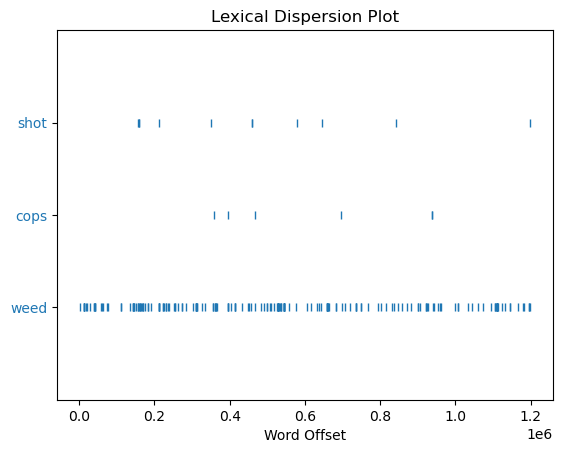

In [16]:
rappers_text.dispersion_plot(["weed", "cops", "shot"])

> *Exercise 2*: Basic stats
>
> * How many tokens are there in the rapper Wikipedia text? How many distinct tokens are there?
> * Explain in your own words what aspect of language _lexical diversity_ describes. 
>     1. Compute the lexical diversity of the rapper Wikipedia text;
>     2. Compute the lexical diversity related to West (coast) and East (coast). Comment on your results.
> * Create frequency distributions for the rapper Wikipedia text, including the cumulative frequency plot for the 75 most common tokens. 
> * Find all the four-letter tokens in the rapper Wikipedia text. With the help of a frequency distribution (FreqDist), show these tokens in decreasing order of frequency.
> * What does the following code do? `sum(len(w) for w in rapperWiki)` Can you use it to work out the average token length of the rapper Wikipedia text?
> * Define a function:
>     1. called `vocab_size(text)` that has a single parameter for the `text`, and which returns the vocabulary size of the text. Apply it to the rapper Wikipedia text;
>     2. `percent(word, text)` that calculates how often a given `word` occurs in a `text`, and expresses the result as a percentage. Apply it to the rapper Wikipedia Text to compute the percentage for *Dre*.

In [17]:
def lexical_diversity(text):
    return len(set(text))/len(text)

In [18]:
print("RAPPERS WIKIPEDIA TEXT")
print(f"Number of tokens: {len(rappers_text)}")
print(f"Number of unique tokens: {len(set(rappers_text))}")
print(f"Lexical diversity: {lexical_diversity(rappers_text)}")

RAPPERS WIKIPEDIA TEXT
Number of tokens: 1202195
Number of unique tokens: 42701
Lexical diversity: 0.03551919613706595


In [19]:
# Building the corpus for the WEST coast

#generate file name list to use
west_coast_rappers = df_rappers.loc[df_rappers.Coast == "West"].Name
file_list_west = [name.replace(" ", "_") + ".txt" for name in west_coast_rappers]

# construct the corpus from article texts
wordlists_west= PlaintextCorpusReader(corpus_root, file_list_west)
west_text = Text(wordlists_west.words())

# Building the corpus for the EAST coast

#generate file name list to use
east_coast_rappers = df_rappers.loc[df_rappers.Coast == "East"].Name
file_list_east = [name.replace(" ", "_") + ".txt" for name in east_coast_rappers]

# construct the corpus from article texts
wordlist_east= PlaintextCorpusReader(corpus_root, file_list_east)
east_text = Text(wordlist_east.words())

# compute lexical diversity for each text
print(f"Word count WEST: {len(west_text)}")
print(f"Word count EAST: {len(east_text)}")
print(f"Lexical diversity WEST: {lexical_diversity(west_text)}")
print(f"Lexical diversity EAST: {lexical_diversity(east_text)}")

Word count WEST: 456690
Word count EAST: 745505
Lexical diversity WEST: 0.056852569576736955
Lexical diversity EAST: 0.04326329132601391


Lexical diversity gives what ratio of the entire text is made up of unique words. The resulting value is greater than 0 and can be a maximum of 1.0 (where every word is unique in our text). The higher the value, the larger the vocabulary and the more varied the text is.

The lexical diversity of the overall text is lower than the lexical diversity of the individual text.

The lexical diversity of the west coast is higher than that of the east coast meaning that unique words make up a larger part of the articles corresponding to west coast rappers. However we can also see that there is much more material on east coast rappers (higher word count). Since written language is constrained by grammar rules and is often redundant, it is expected that a larger sample size can easily have a lower lexical diversity.

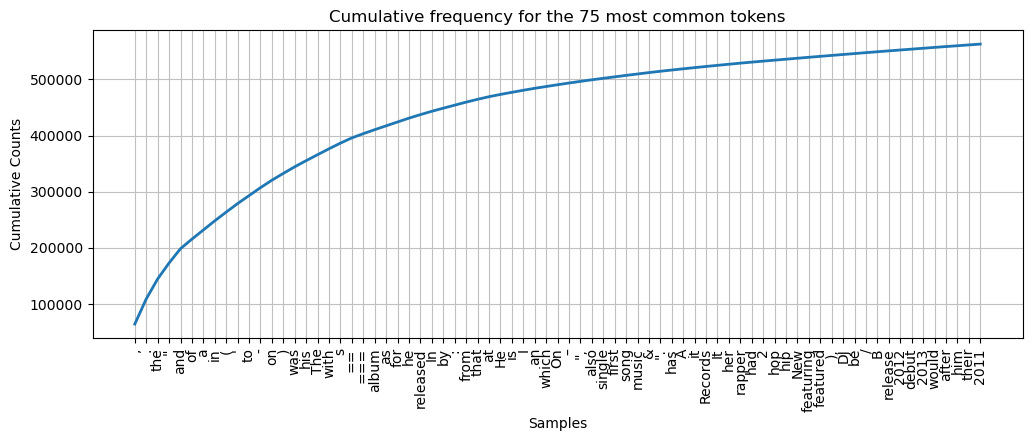

In [20]:
fdist_rappers = FreqDist(rappers_text)
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_title("Cumulative frequency for the 75 most common tokens")
ax = fdist_rappers.plot(75, cumulative=True)
plt.show()

In [21]:
fdist_four_letter = {w: fdist_rappers[w] for w in set(rappers_text) if len(w) == 4}
x = sorted(fdist_four_letter.keys(), key=lambda key: fdist_four_letter[key], reverse=True)

print("List of four letter words in decreasing order of frequency:")
(", ").join([f"{key} ({fdist_four_letter[key]})" for key in x])


List of four letter words in decreasing order of frequency:


'with (10485), from (5392), that (5001), also (2813), song (2612), 2012 (1553), 2013 (1547), 2011 (1453), 2016 (1370), 2014 (1354), 2010 (1323), were (1304), 2015 (1297), 2018 (1220), 2009 (1219), York (1216), 2017 (1192), born (1161), name (1133), year (1112), 2020 (1112), time (1100), 2019 (1085), 2007 (1084), 2008 (1071), 2006 (1030), ==== (992), life (973), been (919), 2005 (885), July (868), June (859), this (831), 2021 (820), solo (818), made (802), when (793), film (789), 2004 (789), they (765), over (758), well (757), City (753), have (741), 2022 (723), then (713), such (689), 2003 (687), show (685), more (674), said (673), 2002 (651), West (648), Love (631), Rock (628), 2001 (625), like (610), This (608), 2000 (606), most (582), Life (575), same (573), 1999 (572), into (571), work (544), went (540), Best (531), Dogg (526), Game (522), That (518), Live (517), 1998 (509), both (501), 1996 (500), King (460), Cena (446), part (446), Park (440), 1997 (437), tour (433), 1995 (427), 

> * What does the following code do? `sum(len(w) for w in rapperWiki)` Can you use it to work out the average token length of the rapper Wikipedia text?
> * Define a function:
>     1. called `vocab_size(text)` that has a single parameter for the `text`, and which returns the vocabulary size of the text. Apply it to the rapper Wikipedia text;
>     2. `percent(word, text)` that calculates how often a given `word` occurs in a `text`, and expresses the result as a percentage. Apply it to the rapper Wikipedia Text to compute the percentage for *Dre*.

The following code adds the lengths of all words in the rapper wiki together. This is equivalent to the number of characters (without spaces) in the text.

In [22]:
sum(len(w) for w in rappers_text)

4661481

In [23]:
# To get the average token length we divide the total character length of the text by the number of tokens
avg_token_length = sum(len(w) for w in rappers_text) / len(rappers_text)
print(f"Average token length: {avg_token_length}")

Average token length: 3.8774749520668443


In [24]:
# returns the vocabulary size (which is the length of the unique word list)
def vocab_size(text):
    return len(set(text))

print(f"Vocabulary size: {vocab_size(rappers_text)}")

Vocabulary size: 42701


In [25]:
# returns the frequency of word in text in percentage
def percent(word, text):
    return text.count(word) / len(text) * 100

print(f"Frequency of the word 'Dre': {percent('Dre', rappers_text):.2}%")

Frequency of the word 'Dre': 0.057%


# Part 3: Working with NLTK and other types of text

So far, we've worked with text from the rapper Wikipedia. But that's not the only source of text in the universe. In fact, it's far from it. Chapter 2 in NLPP is all about getting access to nicely curated texts that you can find built into NLTK.
> 
> Reading: NLPP Chapter 2, Sec. 1 - 4.
>

> *Exercises*: NLPP Chapter 2\. (other stuff that might be due in an assignment)
> 
> * Solve exercise 4, 8, 11, 15, 16, 17, 18 in NLPP, section 2.8\. As always, I recommend you write up your solutions nicely in a `notebook`.
> * Work through exercise 2.8.23 on Zipf's law. [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law) connects to a property of the Barabasi-Albert networks. Which one? Take a look at [this article](https://www.hpl.hp.com/research/idl/papers/ranking/adamicglottometrics.pdf) and write a paragraph or two describing other important instances of power-laws found on the internet.
>

**Exercise 4:** Read in the texts of the State of the Union addresses, using the state_union corpus reader. Count occurrences of men, women, and people in each document. What has happened to the usage of these words over time?

In [37]:
from nltk.corpus import state_union
state_text = state_union.words()
men_count = state_text.count("men")
women_count = state_text.count("women")
people_count = state_text.count("people")
print(f"References to men: {men_count}")
print(f"References to women: {women_count}")
print(f"References to people: {people_count}")

References to men: 228
References to women: 141
References to people: 1291


In [39]:
from nltk.corpus import state_union
state_text = state_union.words()

state_text.dispersion_plot(["people"])

AttributeError: 'ConcatenatedCorpusView' object has no attribute 'dispersion_plot'

It seems the token `men` appears frequently all throughout the texts. `people` is also present throughout. In the case of `women` though we have a few chunks of text were the term is not at all present. Nevertheless, all three terms are frequent.

**Exercise 8:** Define a conditional frequency distribution over the Names corpus that allows you to see which initial letters are more frequent for males vs. females (cf. 4.4).

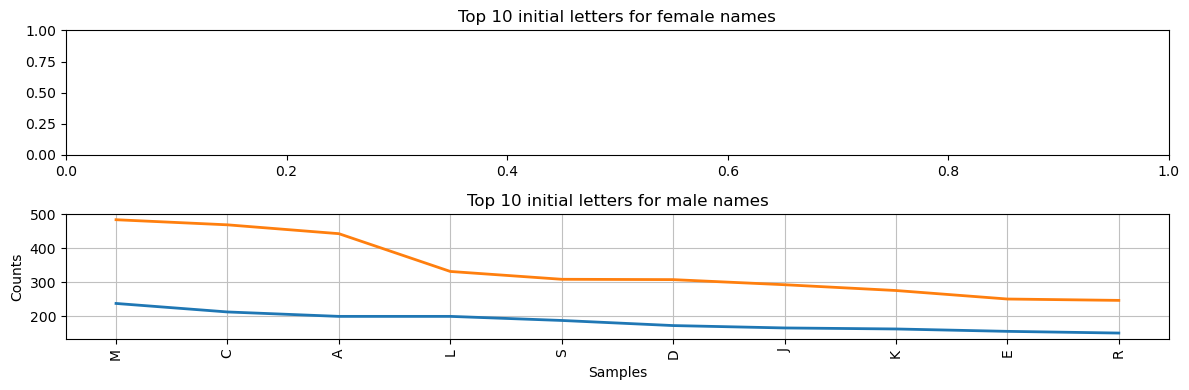

In [31]:
from nltk.corpus import names

fNames = names.words("female.txt")
mNames = names.words("male.txt")
dist_female = FreqDist(name[0] for name in fNames)
dist_male = FreqDist(name[0] for name in mNames)

fig, axs = plt.subplots(2, figsize=(12, 4))
axs[0].set_title("Top 10 initial letters for female names")
axs[1].set_title("Top 10 initial letters for male names")
dist_male.plot(10, cumulative=False, show=False)
dist_female.plot(10, cumulative=False, show=False)
plt.tight_layout()
plt.show()

**Exercise 11:** Investigate the table of modal distributions and look for other patterns. Try to explain them in terms of your own impressionistic understanding of the different genres. Can you find other closed classes of words that exhibit significant differences across different genres?

**Exercise 15:** Write a program to find all words that occur at least three times in the Brown Corpus.

In [32]:
from nltk.corpus import brown

brown_text = brown.words()

fbrown = FreqDist(brown_text)
print("Words occurring at least 3 times in the Brown Corpus:")
print((", ").join([word for word in fbrown.keys() if fbrown[word] >= 3]))

Words occurring at least 3 times in the Brown Corpus:
The, Fulton, County, Grand, Jury, said, Friday, an, investigation, of, Atlanta's, recent, primary, election, produced, ``, no, evidence, '', that, any, irregularities, took, place, ., jury, further, in, the, City, Executive, Committee, ,, which, had, over-all, charge, deserves, praise, and, thanks, Atlanta, for, manner, was, conducted, term, been, charged, by, Superior, Court, Judge, to, investigate, reports, possible, won, Ivan, Allen, Jr., Only, a, relative, handful, such, received, considering, widespread, interest, number, voters, size, this, city, it, did, find, many, Georgia's, registration, laws, are, outmoded, or, inadequate, often, ambiguous, It, recommended, legislators, act, have, these, studied, revised, end, modernizing, improving, them, grand, commented, on, other, topics, among, purchasing, departments, well, operated, follow, generally, accepted, practices, best, both, governments, proposed, However, believes, two, o

**Exercise 16:** Write a program to generate a table of lexical diversity scores (i.e. token/type ratios), as we saw in 1.1. Include the full set of Brown Corpus genres (nltk.corpus.brown.categories()). Which genre has the lowest diversity (greatest number of tokens per type)? Is this what you would have expected?

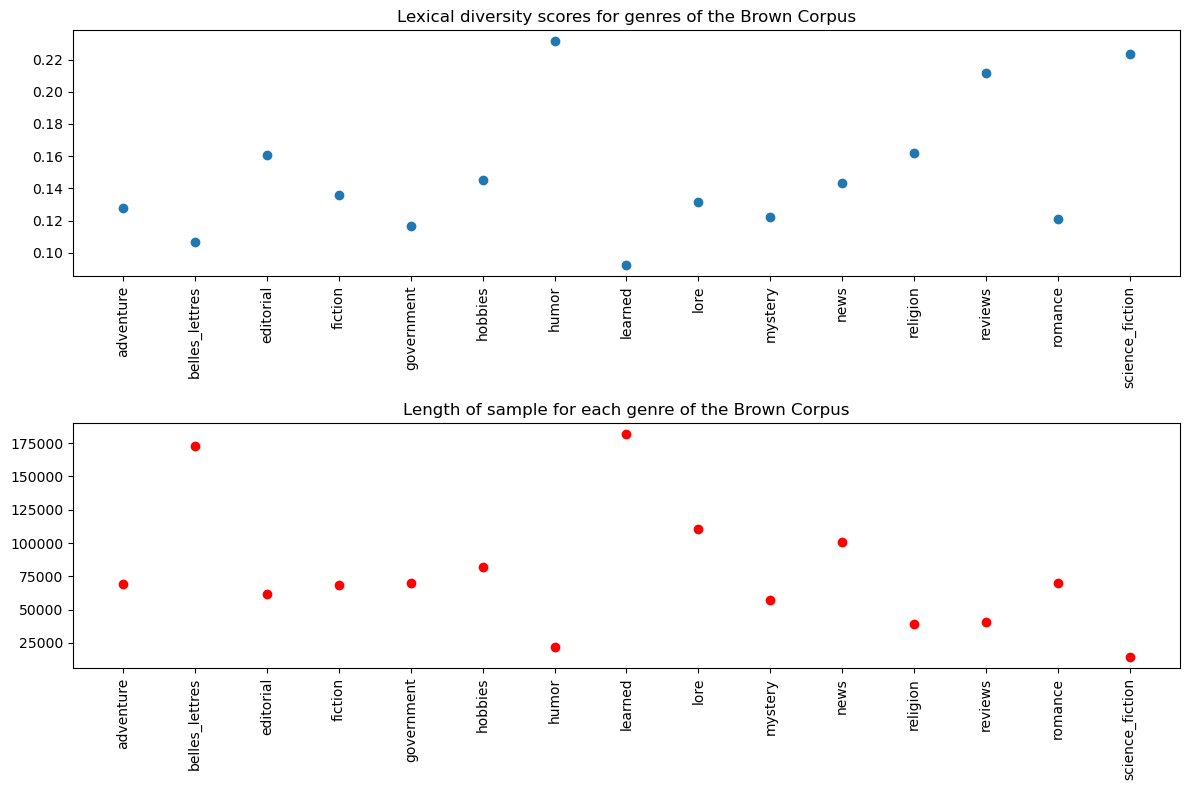

In [33]:
lex_divs = {}
lengths = {}
for cat in brown.categories():
    text = brown.words(categories=cat)
    lex_divs[cat] = lexical_diversity(text)
    lengths[cat] = len(text)
fig, ax = plt.subplots(2, figsize=(12, 8))
ax[0].set_title("Lexical diversity scores for genres of the Brown Corpus")
ax[0].tick_params(axis='x', labelrotation=90)
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].set_title("Length of sample for each genre of the Brown Corpus")
ax[0].scatter(lex_divs.keys(), lex_divs.values())
ax[1].scatter(lengths.keys(), lengths.values(), color="red")
plt.tight_layout()
plt.show()

Humor has the highest lexical diversity which is surprising. When checking the lengths of the samples for each genre, humor is also one of the lowest.

**Exercise 17:** Write a function that finds the 50 most frequently occurring words of a text that are not stopwords.

In [34]:
from nltk.corpus import stopwords

def most_frequent(count, text):
    stop_text = stopwords.words()
    cfd = FreqDist(word for word in text if not word.lower() in stop_text)
    return cfd.most_common(count)

In [35]:
print("50 most frequently occurring non-stopwords in the rappers wiki:")
for item, count in most_frequent(50, rappers_text):
    print(f"{item} ({count})", end=", ")

50 most frequently occurring non-stopwords in the rappers wiki:
, (63835), . (44822), " (28461), ( (15564), ' (15223), - (14134), ) (12101), == (9310), === (7524), album (7138), released (6288), : (5409), – (3073), ", (2937), single (2627), song (2612), music (2503), & (2484), ". (2379), Records (2052), rapper (1961), 2 (1784), hop (1746), hip (1712), featuring (1702), featured (1665), ), (1664), DJ (1650), / (1634), B (1617), release (1560), 2012 (1553), debut (1547), 2013 (1547), 2011 (1453), produced (1405), American (1385), group (1385), 2016 (1370), 2014 (1354), ." (1340), 2010 (1323), 2015 (1297), label (1291), Music (1275), video (1256), 2018 (1220), 2009 (1219), York (1216), Billboard (1196), 

**Exercise 18:** Write a program to print the 50 most frequent bigrams (pairs of adjacent words) of a text, omitting bigrams that contain stopwords.

In [ ]:
stop_text = stopwords.words()
non_stop_words = [word for word in text if not word.lower() in stop_text]
cfd = ConditionalFreqDist(word for word in bigrams(non_stop_words))
# print("50 most frequently occurring non-stopword bigrams in the rappers wiki:")
# sorted([word for word in cfd.keys()], key=lambda key: cfd[key])[:50]